<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/ale-exp1/ale-exp1_cslg-rand-1000_2w_ale_plotting.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

1-way ALE.

> This notebook is for experiment \<ale-exp1\> and data sample \<cslg-rand-1000\>.

### Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/ale-exp1/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)


### Loading data

In [2]:


sys.path.insert(1, '../../')
import numpy as np, sys, os, pandas as pd
from getting_data import read_conf

sample_name = 'cslg-rand-1000'

f_list = [
    'title', 
    'abstract', 
    'venue', 
    # 'authors', 
    'year', 
    'n_citations'
    ]
ale_rs = []
ale_metric = pd.DataFrame(columns=['f1_name', 'f2_name', '2w_ale_range', 'mean'])

def replace_quantile(feature_name, quantile):
    if feature_name == 'year' or feature_name == 'n_citations':
        return quantile
    else:
        return list(range(len(quantile)))

for i in range(len(f_list)):
    f1_name = f_list[i]
    for j in range(i + 1, len(f_list)):
        f2_name = f_list[j]
        file = os.path.join('.', 'scores', f'{sample_name}_2w_ale_{f1_name}_{f2_name}.npz')
        if os.path.exists(file):
            nparr = np.load(file)
            quantile_1 = nparr['quantile_1']
            quantile_2 = nparr['quantile_2']
            ale_result = nparr['ale_result']
            
            if np.mean(ale_result) != 0:
                norm = np.linalg.norm(ale_result)
                ale_result = ale_result / norm
            
            t = f'The mean of the 2-way ale - ({f1_name} * {f2_name}): {np.mean(ale_result)}'
            
            ale_metric.loc[len(ale_metric.index)] = [f1_name, f2_name, np.max(ale_result) - np.min(ale_result), np.mean(ale_result)]
            
            ale = {
                'ale': ale_result,
                'f1_quantile': replace_quantile(f1_name, quantile_1),
                'f2_quantile': replace_quantile(f2_name, quantile_2),
                'f1_name': f1_name,
                'f2_name': f2_name,
                'title': t
            }
            
            ale_rs.append(ale)

print(ale_metric)


    f1_name      f2_name  2w_ale_range      mean
0     title     abstract      0.731907 -0.007270
1     title        venue      0.377964  0.006614
2     title         year      0.636577  0.008097
3     title  n_citations      0.732706 -0.007310
4  abstract        venue      0.500000 -0.005000
5  abstract         year      0.717114 -0.007539
6  abstract  n_citations      0.729575  0.007299
7     venue         year      0.267987  0.011062
8     venue  n_citations      0.798200  0.005218
9      year  n_citations      0.750801  0.007317


### ALE Plots

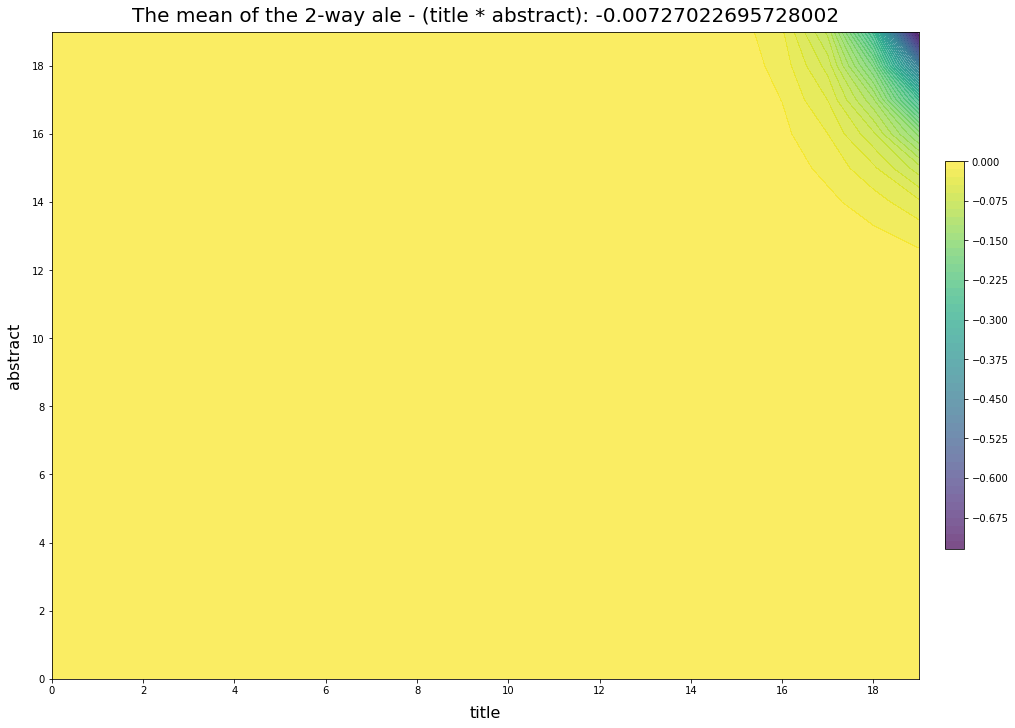

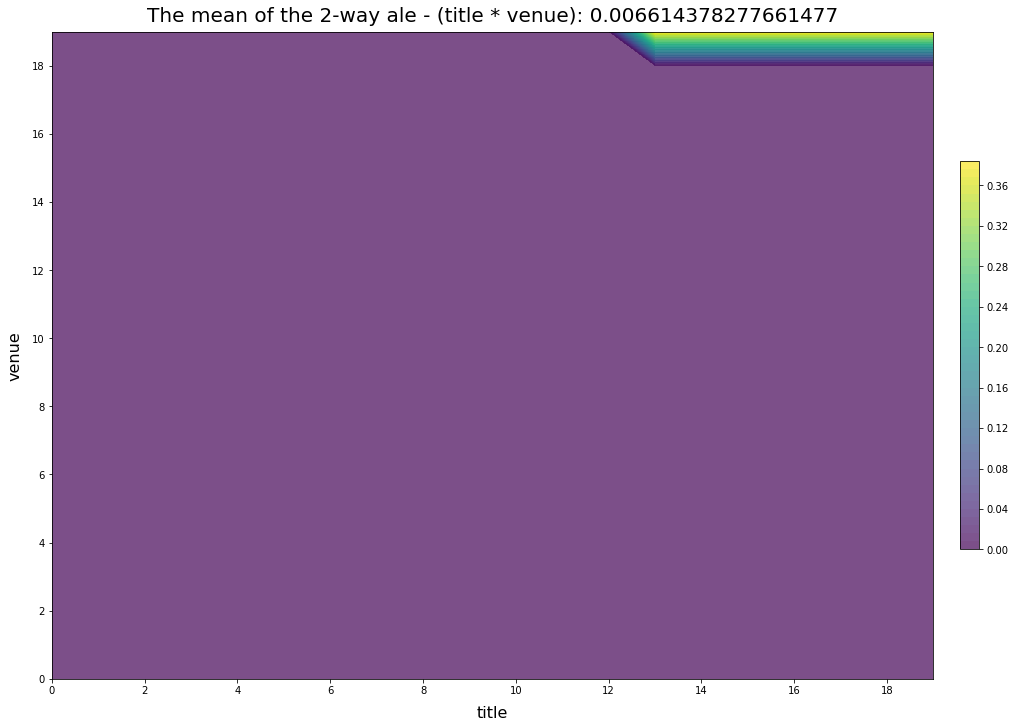

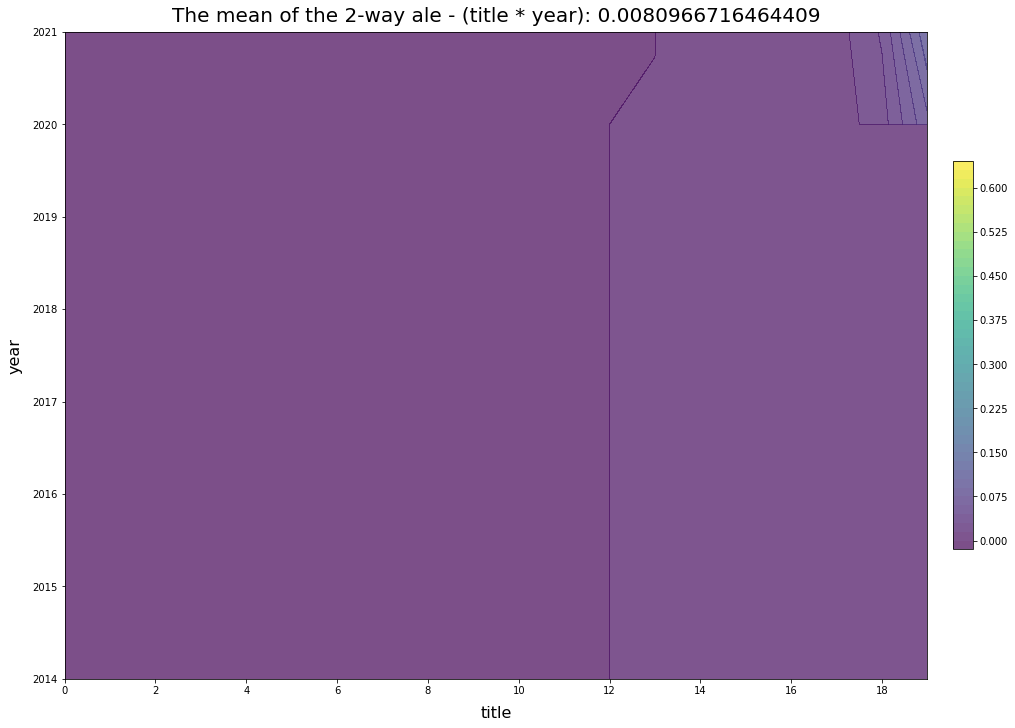

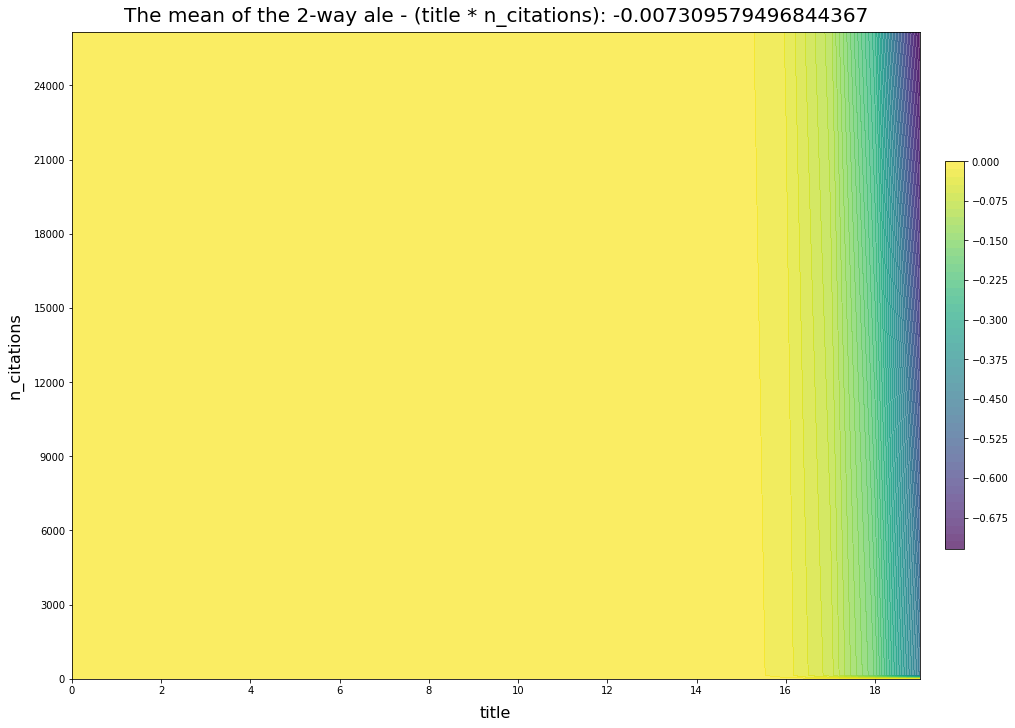

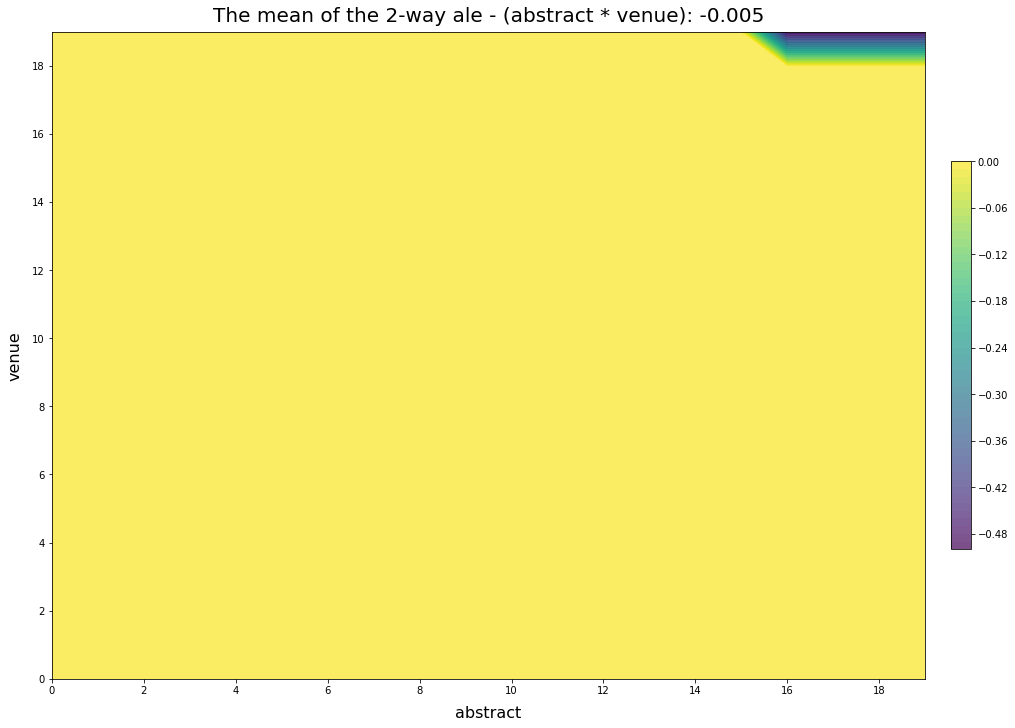

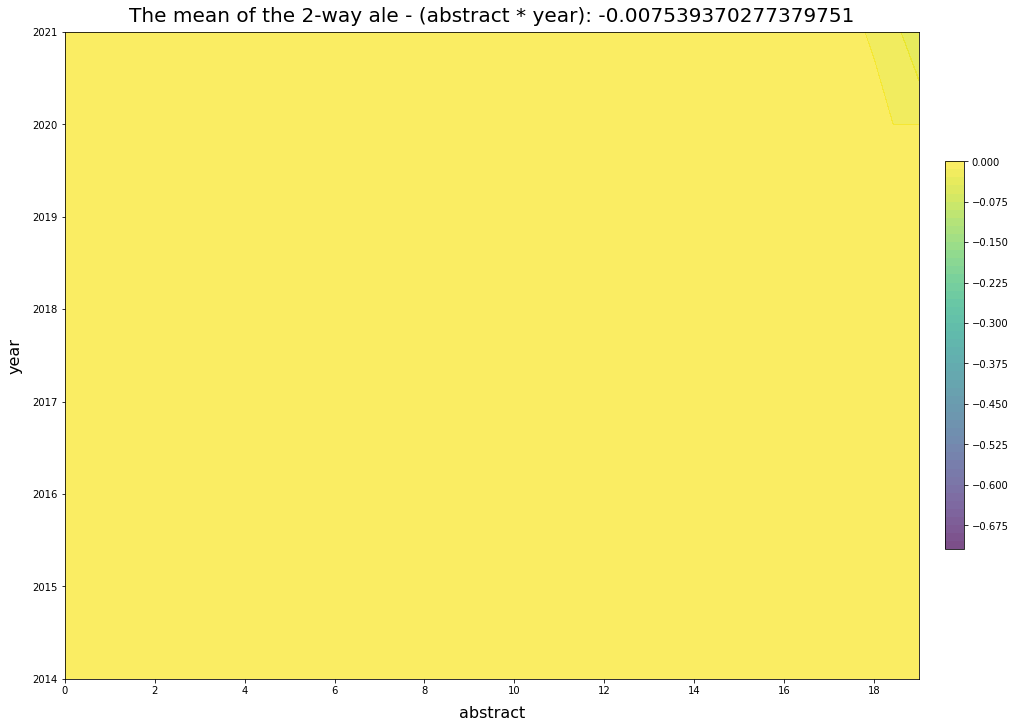

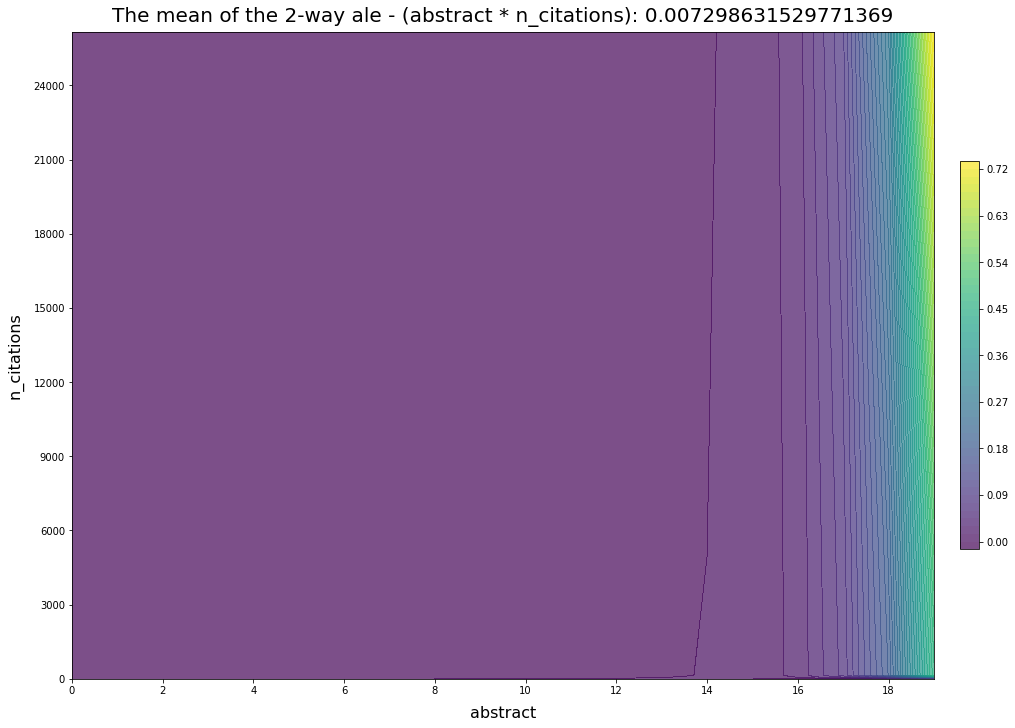

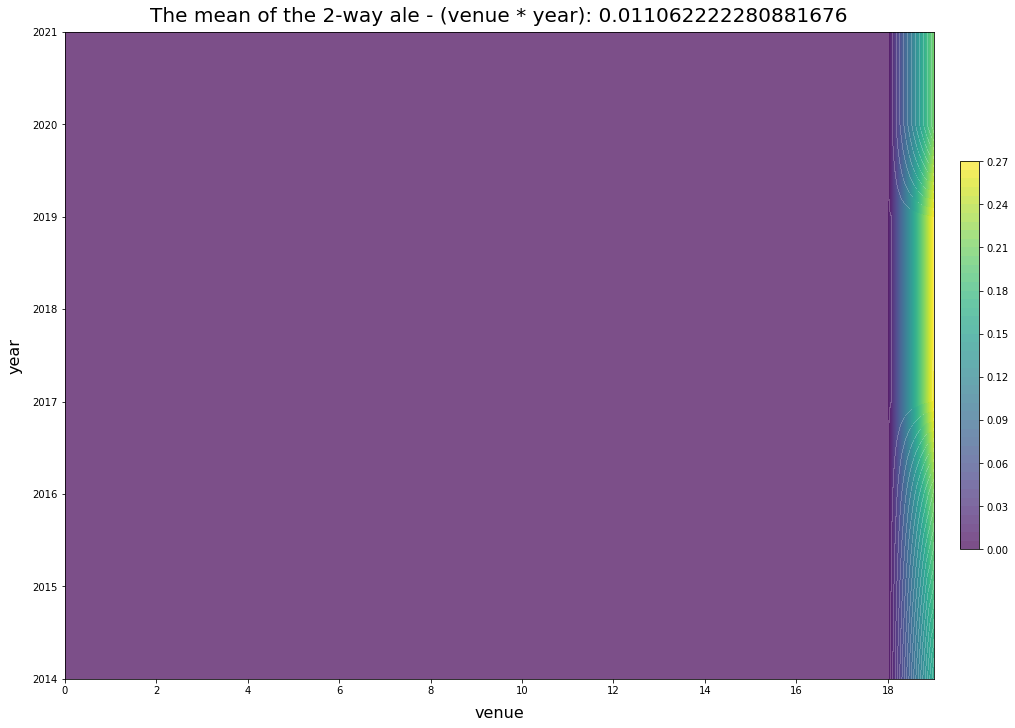

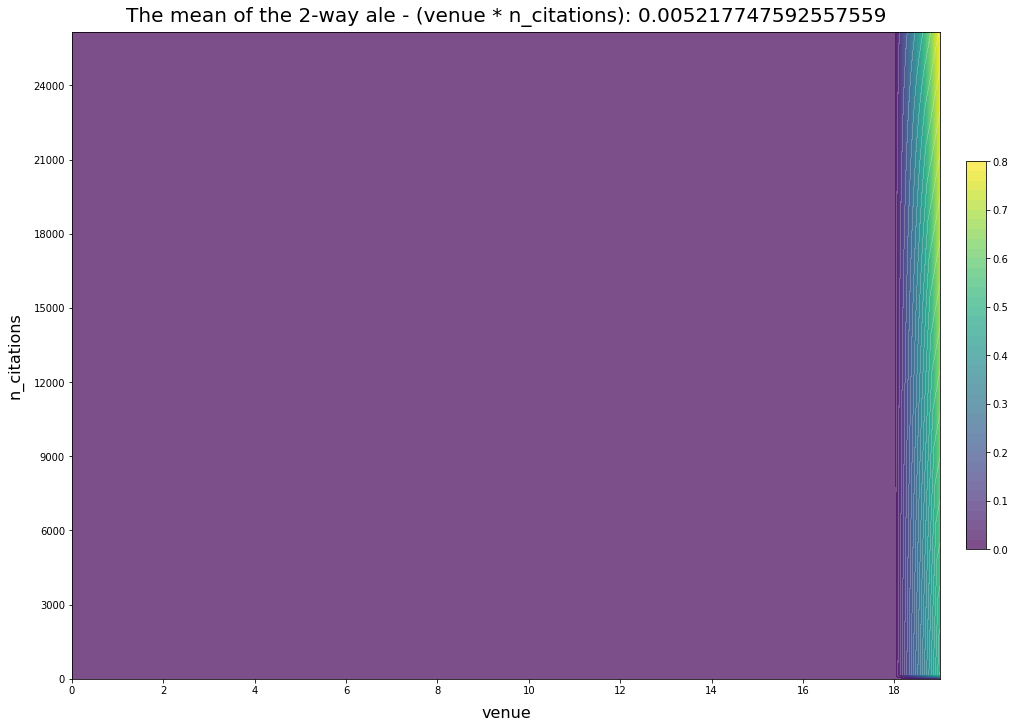

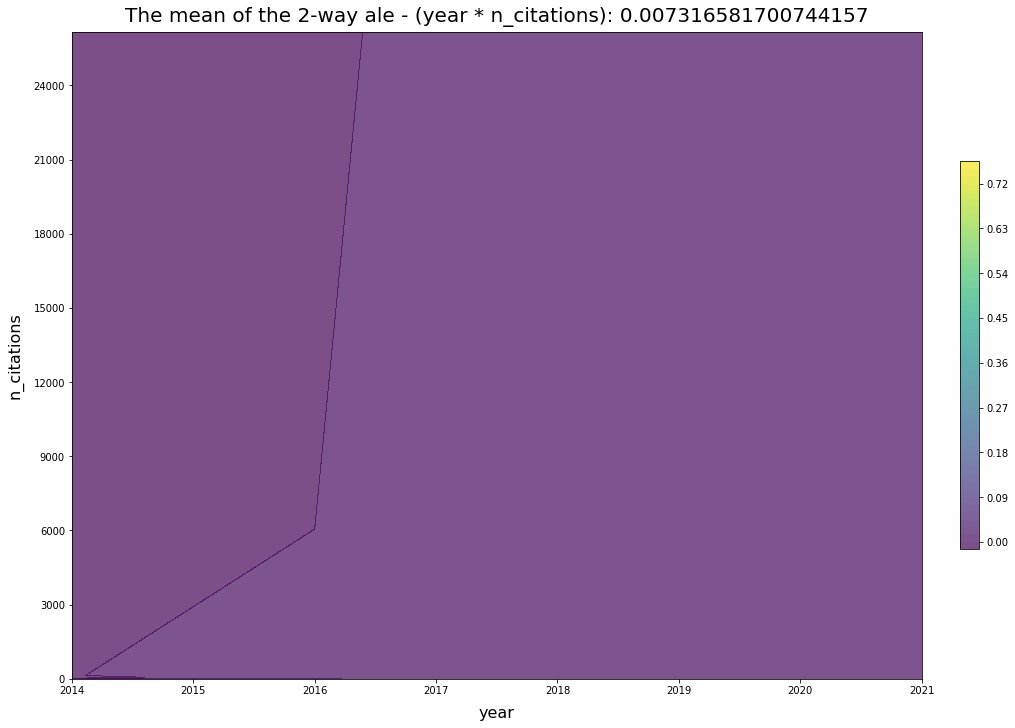

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

for ale in ale_rs:
    fig, ax = plt.subplots(figsize=(14, 10), constrained_layout=True)
    cmap = plt.colormaps['BuGn']
    
    # im = ax.pcolormesh(ale['f1_quantile'], ale['f2_quantile'], ale['ale'],  cmap=None, edgecolors='k', linewidths=0)

    cf = ax.contourf(ale['f1_quantile'], ale['f2_quantile'], ale['ale'], levels=50, alpha=0.7)
    
    ax.set_xlabel(ale['f1_name'], fontsize=16, labelpad=10)
    ax.set_ylabel(ale['f2_name'], fontsize=16, labelpad=10)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(ale['title'], fontsize=20, pad=10)
    fig.colorbar(cf, ax=ax, shrink=0.6, pad=0.03)
    plt.savefig(os.path.join('.', 'plot', f"{sample_name}-2wale-{ale['f1_name']}-{ale['f2_name']}.png"), facecolor='white', transparent=False, bbox_inches='tight')
